In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('./csvfiles/mldata/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
# 돈을 다 갚은 사람과 안갚은 사람의 fico 신용평가점수

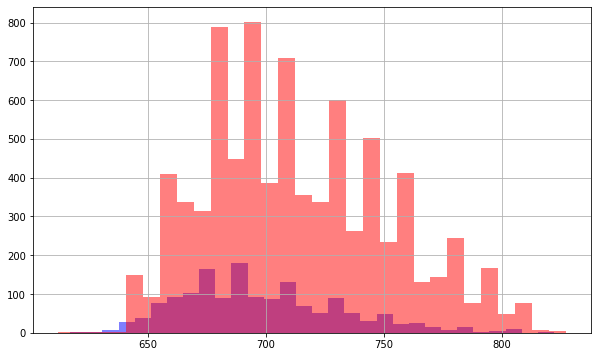

In [27]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='not.fully.paid')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5, color='red', bins=30, label='not.fully.paid')

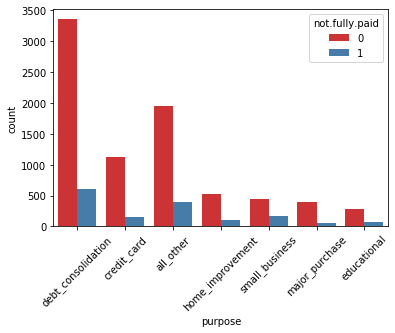

In [29]:
chart = sns.countplot(x='purpose', data=df, palette='Set1', hue='not.fully.paid')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

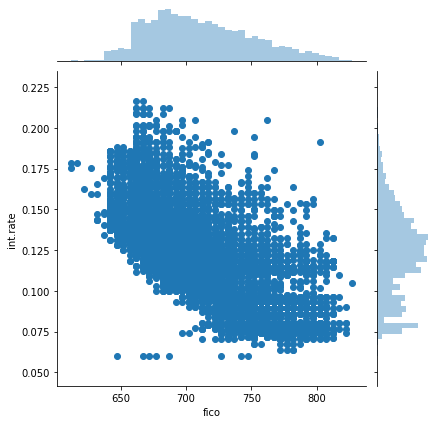

In [32]:
sns.jointplot(x='fico', y='int.rate', data=df)

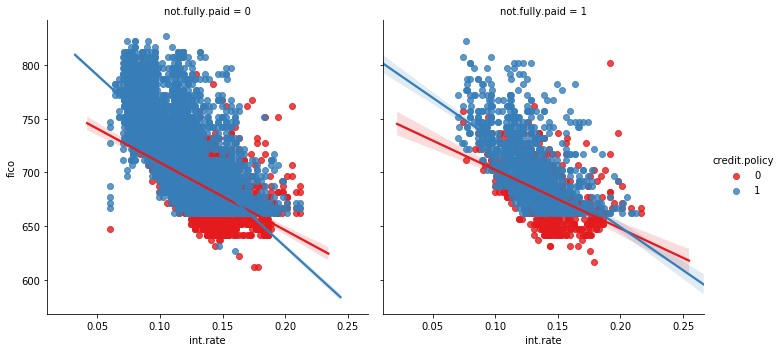

In [34]:
sns.lmplot(x='int.rate',y='fico', data=df, col='not.fully.paid', palette='Set1', hue='credit.policy')

In [4]:
y = df['not.fully.paid']

In [7]:
x = df.drop('not.fully.paid', axis=1)

In [8]:
x = pd.get_dummies(x, drop_first=True)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=77)

In [53]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
predictions = tree.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2451
           1       0.21      0.23      0.22       423

    accuracy                           0.76      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.77      0.76      0.76      2874



In [56]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train, y_train)
predictions2 = rfc.predict(x_test)
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2451
           1       0.26      0.01      0.02       423

    accuracy                           0.85      2874
   macro avg       0.56      0.50      0.47      2874
weighted avg       0.77      0.85      0.79      2874

